<a href="https://colab.research.google.com/github/letien2106/TMDU/blob/main/demo01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/letien2106/TMDU.git


Cloning into 'TMDU'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_excel("/content/TMDU/Vietnam-Macroeconomic-Data.xls",index_col=0).T

In [4]:
df.replace('no data',np.nan,inplace=True)
df.head(10)

Year,"GDP, current prices (Billions of U.S. dollars)",Unemployment rate
1980,27.847,NaN
1981,13.875,NaN
1982,18.405,NaN
1983,27.726,NaN
1984,48.177,NaN
1985,14.999,NaN
1986,33.873,NaN
1987,42.045,NaN
1988,23.234,NaN
1989,6.293,NaN


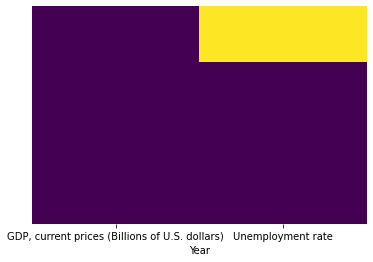

In [5]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [6]:
df.describe()

Year,"GDP, current prices (Billions of U.S. dollars)",Unemployment rate
count,39.000000,29.000000
mean,67.716077,5.703448
std,68.195658,2.855006
min,6.293000,2.100000
25%,22.016000,4.300000
50%,33.873000,5.600000
75%,99.951500,6.400000
max,241.272000,12.300000


In [7]:
plt.boxplot(x='GDP, current prices (Billions of U.S. dollars)',data=df,year>'2016')

SyntaxError: ignored

{'boxes': [<matplotlib.lines.Line2D at 0x7f17d1e4b810>],
 'caps': [<matplotlib.lines.Line2D at 0x7f17d1e4f850>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f17d1e57890>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f17d1e57350>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f17d1e4bd90>,
  <matplotlib.lines.Line2D at 0x7f17d1e4f310>]}

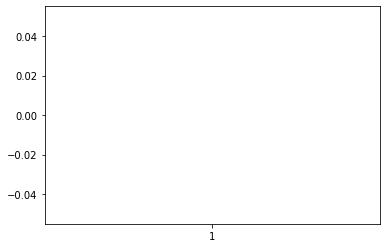

In [ ]:
plt.boxplot(x='Unemployment rate',data=df)

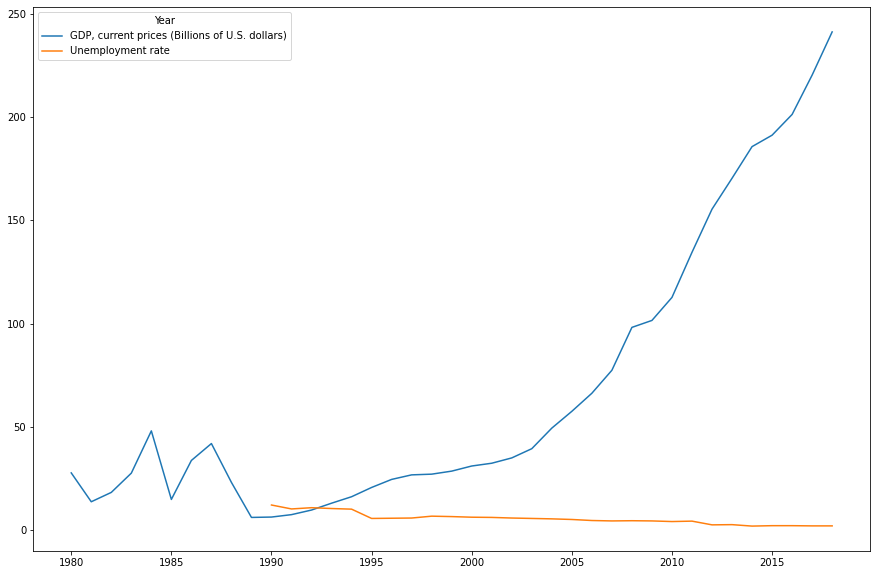

In [ ]:
df.plot(figsize=(15,10))